In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()

In [10]:
measures = '../Data/data_differentiator_bode.txt'
simulation_noC = '../Data/Simulations/DIFF_OUT.txt'
simulation_C = '../Data/Simulations/DIFF_OUT_C.txt'

data = pd.read_csv(measures, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['dec', 'H (dB)', 'err X', 'err H']

sim = pd.read_csv(simulation_noC, sep = '\t', index_col = False, header = None)
sim.index = np.arange(1, len(sim)+1)
sim.columns = ['dec', 'H (dB)']

sim2 = pd.read_csv(simulation_C, sep = '\t', index_col = False, header = None)
sim2.index = np.arange(1, len(sim2)+1)
sim2.columns = ['dec', 'H (dB)']

In [11]:
data.drop('err X', axis='columns', inplace=True)

In [12]:
sim2['dec'] = np.log10(sim2['dec'])
sim2

,dec,H (dB)
1,2.0,-25.913546
2,2.1,-23.913606
3,2.2,-21.913702
4,2.3,-19.913854
5,2.4,-17.914094
6,2.5,-15.914475
7,2.6,-13.915079
8,2.7,-11.916036
9,2.8,-9.917552
10,2.9,-7.919954


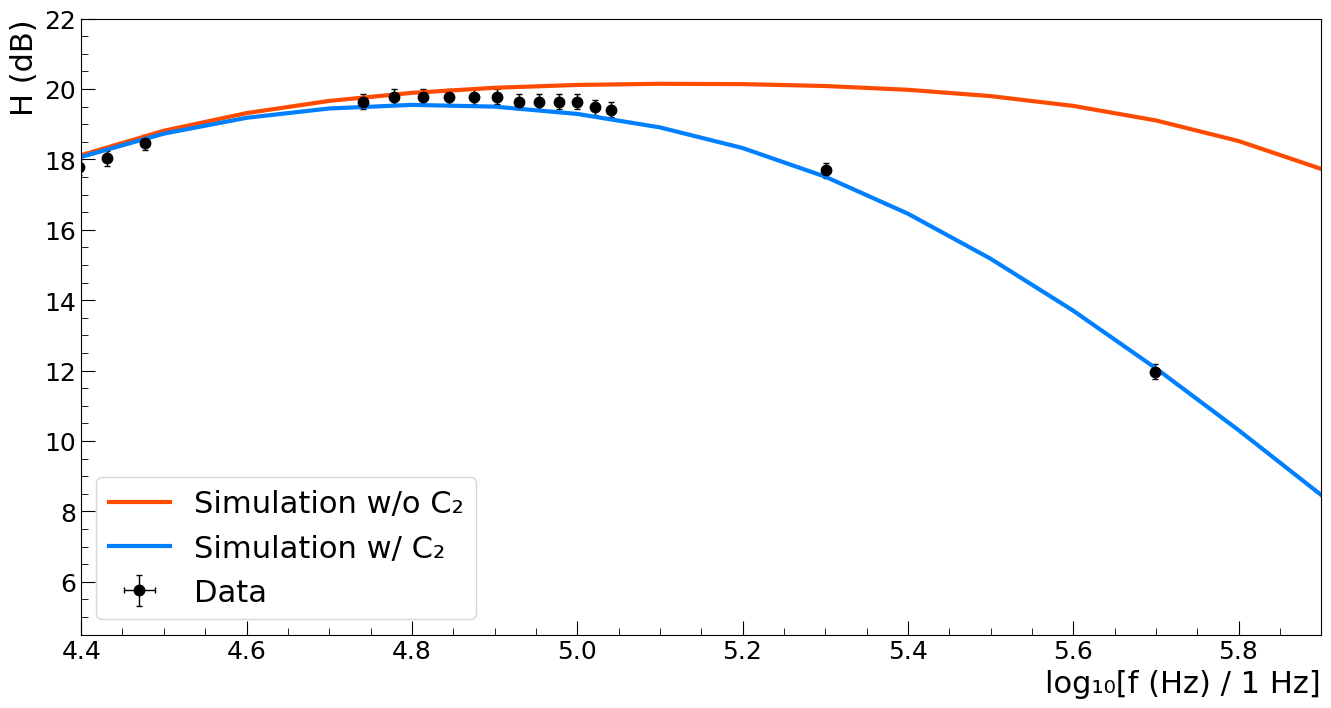

In [13]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.errorbar(data['dec'], data['H (dB)'], xerr=0, yerr=data['err H'], marker = '.',
             elinewidth=1, color = '#000000', linewidth=0, capsize=2, label = 'Data', markersize = 15)

# PLOT SIMULATION WITHOUT C
ax1.plot(sim['dec'], sim['H (dB)'], color = '#FF4B00', linewidth = 3, label = 'Simulation w/o C\u2082')

# PLOT SIMULATION WITH C
ax1.plot(sim2['dec'], sim2['H (dB)'], color = '#0080ff', linewidth = 3, label = 'Simulation w/ C\u2082')

# AXIS LABELS
ax1.set_xlabel('log\u2081\u2080[f (Hz) / 1 Hz]', fontsize = 22, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 22, loc = 'top')


# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()


# PLOT RANGE
ax1.set_xlim(left = 4.4, right = 5.9)
ax1.set_ylim(bottom = 4.5, top = 22)

# MAKE LEGEND
ax1.legend(loc = 'best', prop = {'size': 22})

# SAVE FIGURE
fig.savefig('../Plots/Report_Plots/diff_sim_comp.png', dpi = 300)

plt.show()

In [14]:
file = '../Data/data_differentiator_bode_r.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['dec', 'H (dB)', 'err H']
data_fit = data.iloc[:3, :]
data_fit

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [4]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x
    

In [16]:
# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data_fit['dec'], ydata = data_fit['H (dB)'], sigma = data_fit['err H'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []

for i in range(len(par_lin)):
    try:
        error.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par_lin
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# COMPUTE RESIDUALS
func = lin(data_fit['dec'], *par_lin)
res = data_fit['H (dB)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/data_fit['err H'])**2)

print('Offset: ' + format(a, '1.2f') + ' +/- ' + format(err_a, '1.2f') + '\n' + 'Slope: ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f'))

print(chi2)

Offset: -63.18 +/- 0.30
Slope: 18.98 +/- 0.09
8.82777270256867


# THEBODE

In [17]:
def lin(x, a, b):  
    return a + b * x

In [18]:
def parab(x, c, d, e):  
    return c + d * x + e * x**2

In [19]:
sigmaL = 0.040
sigmaK = 0.015

In [37]:
file_name = '../Data/datadiff.txt'
data = pd.read_csv(file_name, index_col = False, header = None, sep = '\t')
data.index = np.arange(1, len(data)+1)
data.columns = ['freq (Hz)', 'Vin (V)', 'Vout (V)', 'Vin/div', 'Vout/div']

sim = pd.read_csv('../Data/Simulations/DIFF_OUT.txt', index_col = False, header = None, sep = '\t')
sim.columns = ['f', 'H']

# CALCOLO FUNZIONE DI TRASFERIMENTO ED ERRORE
data['T'] = data['Vout (V)'] / data['Vin (V)']
data['sigma T'] = data['T'] * np.sqrt( (sigmaL * data['Vin/div'] / data['Vin (V)'])**2 + (sigmaL * data['Vout/div'] / data['Vout (V)'])**2 + 2 * (sigmaK)**2)
data['sigma Tr'] = data['T'] * np.sqrt( (sigmaL * data['Vin/div'] / data['Vin (V)'])**2 + (sigmaL * data['Vout/div'] / data['Vout (V)'])**2)

# CALCOLO I LOGARITMI PER BODE
data['log10f (dec)'] = np.log10(data['freq (Hz)'])
data['H (dB)'] = 20 * np.log10(data['T'])

# PROPAGO L'ERRORE AI LOGARITMI
data['sigma H (dB)'] = 20 * data['sigma T'] / ( data['T'] * np.log(10) )
data['sigma Hr (dB)'] = 20 * data['sigma Tr'] / ( data['T'] * np.log(10) )

# CONSTANTS
XMIN = 1.8
XMAX = 6.2
YMIN = -30
YMAX = 25
RESXMIN = XMIN
RESXMAX = XMAX
RESYMIN = -0.45
RESYMAX = 0.45

# ARANCIONE
data1 = data.iloc[:3, :]

# BLU
data2 = data.iloc[3:28, :]

data

,freq (Hz),Vin (V),Vout (V),Vin/div,Vout/div,T,sigma T,sigma Tr,log10f (dec),H (dB),sigma H (dB),sigma Hr (dB)
1,100,0.976,0.052,0.2,0.02,0.053279,0.001463,0.000929,2.000000,-25.468929,0.238486,0.151412
2,1000,0.984,0.492,0.2,0.10,0.500000,0.012064,0.005749,3.000000,-6.020600,0.209580,0.099868
3,10000,0.992,4.240,0.2,1.00,4.274194,0.105047,0.053048,4.000000,12.617084,0.213474,0.107802
4,15000,0.992,5.790,0.2,2.00,5.836694,0.155079,0.093377,4.176091,15.323338,0.230781,0.138959
5,17000,0.984,6.250,0.2,2.00,6.351626,0.165623,0.096314,4.230449,16.057698,0.226490,0.131710
6,18000,0.984,6.430,0.2,2.00,6.534553,0.169255,0.097120,4.255273,16.304317,0.224979,0.129094
7,19000,0.984,6.700,0.2,2.00,6.808943,0.174748,0.098358,4.278754,16.661594,0.222919,0.125471
8,20000,0.984,6.910,0.2,2.00,7.022358,0.179054,0.099345,4.301030,16.929659,0.221471,0.122878
9,21000,0.984,7.010,0.2,2.00,7.123984,0.181114,0.099822,4.322219,17.054458,0.220823,0.121707
10,22000,0.984,7.240,0.2,2.00,7.357724,0.185875,0.100936,4.342423,17.334869,0.219427,0.119157


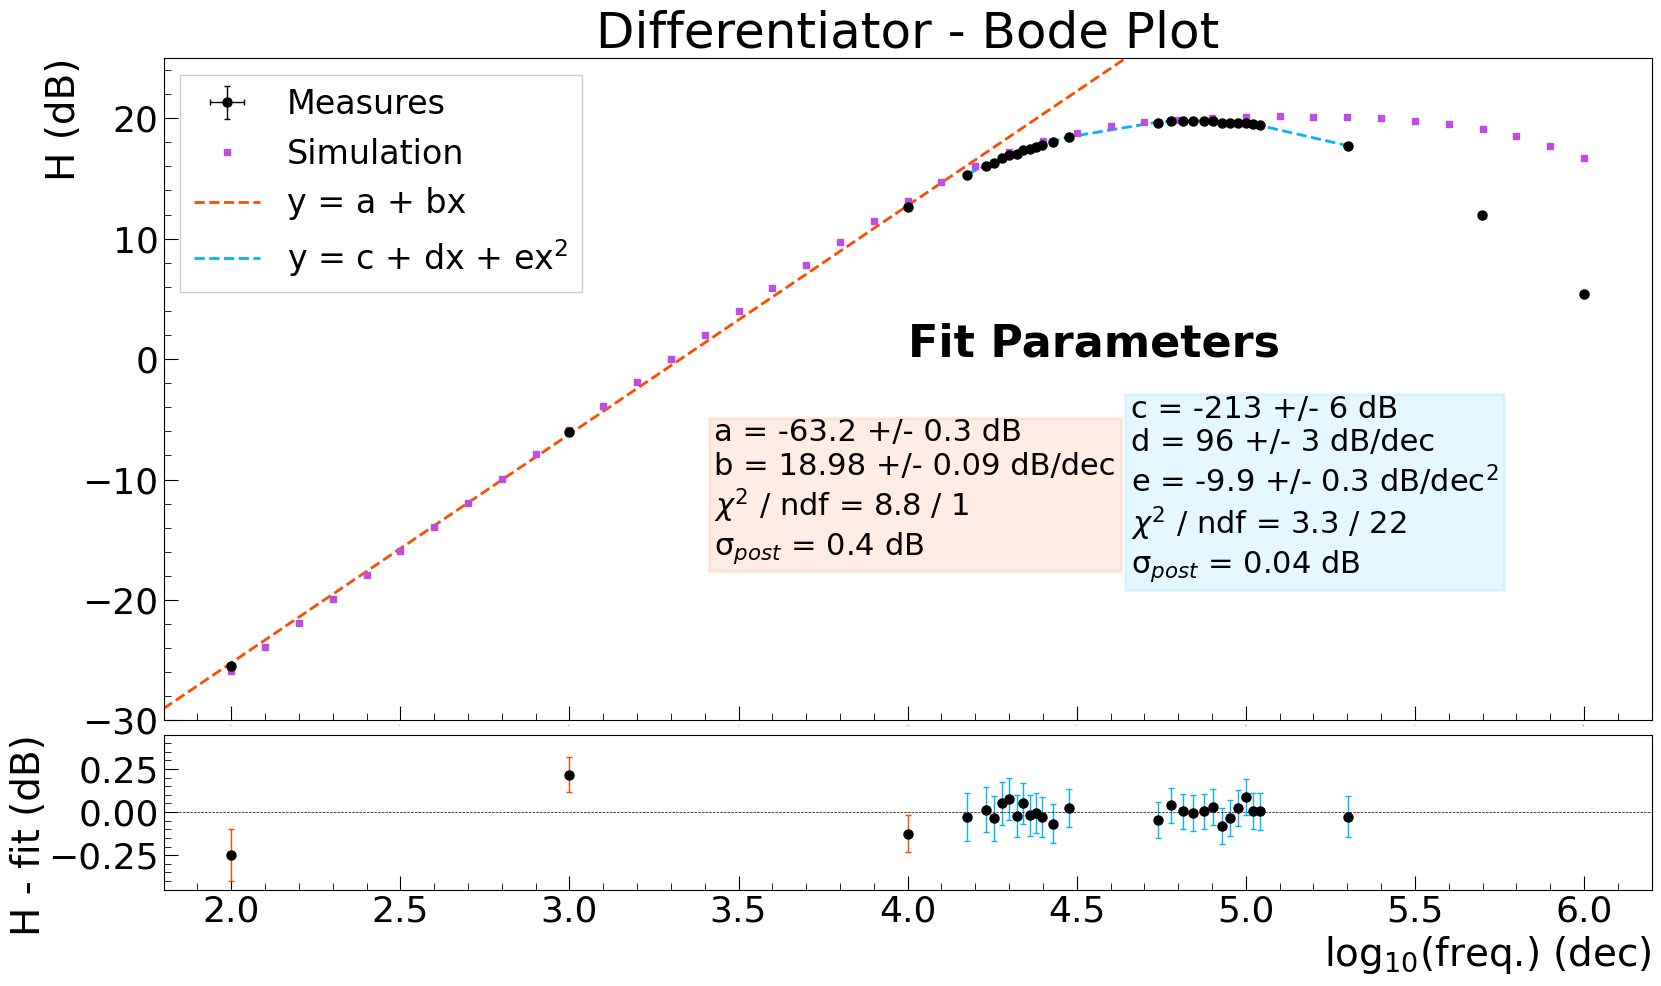

In [57]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(19.2, 10.8), dpi = 100)
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=8, colspan=1)
ax2 = plt.subplot2grid((10, 1), (8, 0), rowspan=2, colspan=1)

# PERFORM THE FITS

# ARANCIONE
par1, cov1 = curve_fit(f = lin, xdata = data1['log10f (dec)'], ydata = data1['H (dB)'], sigma = data1['sigma Hr (dB)'], absolute_sigma = True)
func1 = lin(data['log10f (dec)'], *par1)

# BLU
par2, cov2 = curve_fit(f = parab, xdata = data2['log10f (dec)'], ydata = data2['H (dB)'], sigma = data2['sigma Hr (dB)'], absolute_sigma = True)
func2 = parab(data['log10f (dec)'], *par2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error1 = []
error2 = []

# ARANCIONE
for i in range(len(par1)):
    try:
        error1.append(np.absolute(cov1[i][i])**0.5)
    except:
        error1.append( 0.00 )

# BLU
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

# ARANCIONE
fit_par1 = par1
fit_err1 = np.array(error1)

# BLU
fit_par2 = par2
fit_err2 = np.array(error2)

# ARANCIONE
a = fit_par1[0]
b = fit_par1[1]
err_a = fit_err1[0]
err_b = fit_err1[1]

# BLU
c = fit_par2[0]
d = fit_par2[1]
e = fit_par2[2]
err_c = fit_err2[0]
err_d = fit_err2[1]
err_e = fit_err2[2]

# COMPUTE RESIDUALS

# ARANCIONE
res1 = data1['H (dB)'] - lin(data1['log10f (dec)'], *par1)
# BLU
res2 = data2['H (dB)'] - parab(data2['log10f (dec)'], *par2)

# COMPUTE CHI2

# ARANCIONE
chi21 = np.sum((res1/data1['sigma Hr (dB)'])**2)

# BLU
chi22 = np.sum((res2/data2['sigma Hr (dB)'])**2)

# COMPUTE SIGMA_POST

# ARANCIONE
sigma_post1 = np.sqrt( np.sum( res1**2 ) / (len(data1['log10f (dec)']) - 2) )

# BLU
sigma_post2 = np.sqrt( np.sum( res2**2 ) / (len(data2['log10f (dec)']) - 2) )

# PLOT FIT FUNCTIONS
ax1.plot(np.arange(XMIN, XMAX + 1, 1), lin(np.arange(XMIN, XMAX + 1, 1), *par1), color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'y = a + bx')
ax1.plot(data2['log10f (dec)'], parab(data2['log10f (dec)'], *par2), color = '#00b4ff', linewidth = 2, linestyle = 'dashed', label = 'y = c + dx + ex$^2$')

# PLOT DATA
ax1.errorbar(data['log10f (dec)'], data['H (dB)'], xerr = 0, yerr = data['sigma Hr (dB)'], marker = '.', markersize = 13, elinewidth=1, color = '#000000', linewidth=0, capsize=2, label = 'Measures')

# PLOT SIMULATIONS
ax1.plot(sim['f'], sim['H'], color = '#BE4EE1', linewidth = 0, linestyle = '-', marker = 's', markersize = 5, label = 'Simulation')

# DRAW RESIDUALS

# ARANCIONE
ax2.errorbar(data1['log10f (dec)'], res1, xerr = 0, yerr = data1['sigma Hr (dB)'], marker = '.', markersize = 13, elinewidth=1, color = '#000000', ecolor = '#FF4B00', linewidth=0, capsize=2, label = 'Measures')

# BLU 
ax2.errorbar(data2['log10f (dec)'], res2, xerr = 0, yerr = data2['sigma Hr (dB)'], marker = '.', markersize = 13, elinewidth=1, color = '#000000', ecolor = '#00b4ff', linewidth=0, capsize=2, label = 'Measures')

# DRAW DASHED 'ZERO' LINE
ax2.axhline(color = '#000000', linewidth = 0.5, linestyle = 'dashed')

# PRINT FIT RESULTS ON THE PLOT

# BLU
cc = 'c = ' + format(c, '1.0f') + ' +/- ' + format(err_c, '1.0f') + ' dB'
dd = 'd = ' + format(d, '1.0f') + ' +/- ' + format(err_d, '1.0f') + ' dB/dec'
ee = 'e = ' + format(e, '1.1f') + ' +/- ' + format(err_e, '1.1f') + ' dB/dec$^2$'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(data2['log10f (dec)']) - 3, '1.0f') 
sigmap2 = '\u03C3$_{post}$ = ' + format(sigma_post2, '1.2f') + ' dB'

# ARANCIONE
aa = 'a = ' + format(a, '1.1f') + ' +/- ' + format(err_a, '1.1f') + ' dB'
bb = 'b = ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f') + ' dB/dec'
chisq1 = '$\chi^{2}$ / ndf = ' + format(chi21, '1.1f') + ' / ' + format(len(data1['log10f (dec)']) - 2, '1.0f') 
sigmap1 = '\u03C3$_{post}$ = ' + format(sigma_post1, '1.1f') + ' dB'


ax1.text(0.50, 0.55, 'Fit Parameters', fontsize = 32, fontweight = 'bold', transform=ax1.transAxes)

# ARANCIONE
ax1.text(0.37, 0.25, aa + '\n' + bb + '\n' + chisq1 + '\n' + sigmap1, fontsize = 22, color = '#000000', transform = ax1.transAxes, 
            bbox = dict( facecolor = '#FF4B00', edgecolor = '#FF4B00', alpha = 0.1, linewidth = 2 ))

# BLU        
ax1.text(0.65, 0.2225, cc + '\n' + dd + '\n' + ee + '\n' + chisq2 + '\n' + sigmap2, fontsize = 22, color = '#000000', transform = ax1.transAxes, 
            bbox = dict( facecolor = '#00b4ff', edgecolor = '#00b4ff', alpha = 0.1, linewidth = 2 ))
    
# PLOT TITLE
ax1.set_title('Differentiator - Bode Plot', fontsize = 36)

# AXIS LABELS
# ax1.set_xlabel('log$_{10}$(freq.) (dec)', fontsize = 24, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 28, loc = 'top', labelpad = 0)
ax2.set_xlabel('log$_{10}$(freq.) (dec)', fontsize = 28, loc = 'right')
ax2.set_ylabel('H - fit (dB)', fontsize = 28, loc = 'top', labelpad = 0)

# AXIS TICKS
ax1.tick_params(axis = 'x', which = 'major', labelsize = 0, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 26, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 26, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = XMIN, right = XMAX)
ax1.set_ylim(bottom = YMIN, top = YMAX)
ax2.set_xlim(left = RESXMIN, right = RESXMAX)
ax2.set_ylim(bottom = RESYMIN, top = RESYMAX)

# MAKE LEGEND
handles, labels = ax1.get_legend_handles_labels()
order = [3, 2, 0, 1]
ax1.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc = 'upper left', prop = {'size': 24}, 
            ncol = 1, frameon = True, fancybox = False, framealpha = 1)

# SAVE FIGURE
#fig.savefig('../Plots/Report_Plots/diff_bode_plot.png', dpi = 300, facecolor = 'white')
    
plt.show()